**Giang Pham**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 6A: K-Nearest Neighbor

In this lab we will be using the library scikit-learn to train a K-Nearest Neighbor classifier and graph the results.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from palettable import cartocolors

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_77804/1107281137.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_77804/1107281137.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


## Task 1: Load and visualize dataset

- Below, load in the datasets (`file_train.csv`, `file_test.csv`). the training set has 800 samples and the test set has 200 samples.
- Create a figure with two subplots showing the train and test data side-by-side.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of data
- Column 1: x coordinate of a 2D point.
- Column 2: y coordinate of a 2D point.
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1]

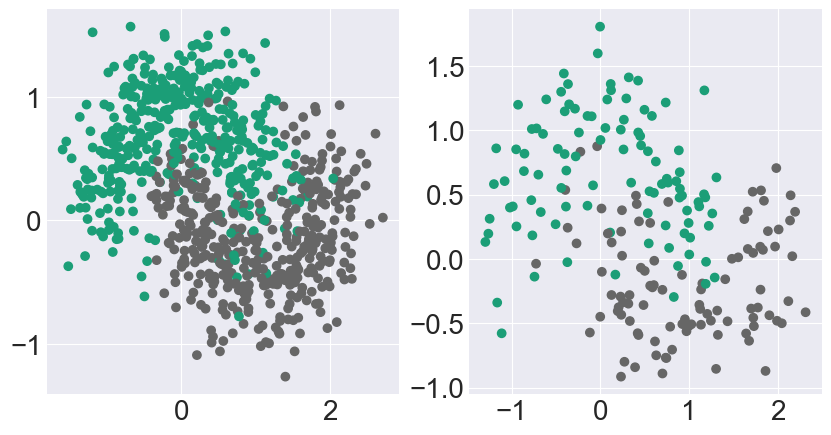

In [35]:
train = pd.read_csv("data/file_train.csv")
test = pd.read_csv("data/file_test.csv")

colors = cartocolors.qualitative.Safe_4.mpl_colors
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].scatter(train.iloc[:,0], train.iloc[:,1], c = train.iloc[:,2], cmap ="Dark2")
ax[1].scatter(test.iloc[:,0], test.iloc[:,1], c = test.iloc[:,2], cmap = "Dark2")
plt.show()

## Task 2: Predict dataset and graph results

1. Create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set `n_neighbors` equal to 10.
2. Use the fit method with the coordinate columns of the training dataset as X and the class column as the target.
3. Calculate the accuracy of the classifier with the test data using the score method.
4. Print the accuracy of the classifier.
    

In [43]:
print("Your accuracy should be 0.92")

X = np.array(train.iloc[:,[0,1]])
Y = np.array(train.iloc[:,2])

Xt = np.array(test.iloc[:,[0,1]])
Yt = np.array(test.iloc[:,[2]])

classifier = neighbors.KNeighborsClassifier(n_neighbors=10)
classifier.fit(X, Y)
print("accuracy: ", classifier.score(Xt, Yt))

Your accuracy should be 0.92
accuracy:  0.9195979899497487


## Task 3: Visualize class boundaries

Visualize how different regions of the (2D) dataspace would be classified based on the results of the trained KNN Classifier from Task 2.

1. Create a meshgrid for predicting values
    1. Create a [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) for your x-axis and your y-axis
        2. Set the start argument to the min value of your column -.5
        3. Set the end argument to the max value of your column +.5
        4. Set the number of samples to 300
    2. Assign `x_samples` and `y_samples` to a [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the linspace as the arguments for x1 and x2.
    3. [Flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html)`x_samples` and `y_samples` and save into new variables.
    3. Create a list of x and y sample coordinate pairs, by [column stacking](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) the flattened x_samples and y_samples
2. Use your coordinate pairs as predict inputs for the knn classifier you created in Task 2. 
3. Reshape the results to the same shape as `x_samples`.
1. In 1 plot, graph your results
    1. Create two [ListedColormap](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.colors.ListedColormap.html) [(example)](https://matplotlib.org/3.2.1/tutorials/colors/colormap-manipulation.html)
        1. One should have dark values of 2 colors
        1. One should have light values of the same 2 colors
    1. Use [pcolormesh](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) to plot your predicted values grid.
        1. Plot x_samples, y_samples and your reshaped predicted results and the light value colormap.
    2. Plot the training points with using a scatter plot with the dark value colormap.
    3. Title your plot and label the axis.

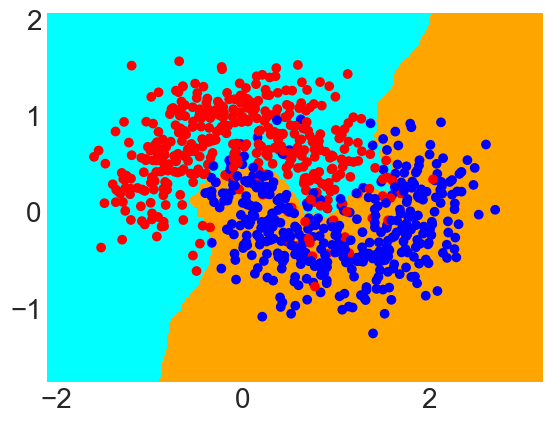

In [48]:
train = np.array(train)
x_samples = train[:,0]
y_samples = train[:,1]

linx = np.linspace(np.min(x_samples)-0.5, np.max(x_samples)+0.5, 300)
liny = np.linspace(np.min(y_samples)-0.5, np.max(y_samples)+0.5, 300)
xgrid, ygrid = np.meshgrid(linx, liny)

xflat = xgrid.flatten()
yflat = ygrid.flatten()
xyflat = np.column_stack((xflat, yflat))

pred_lin = classifier.predict(xyflat).reshape(xgrid.shape)

colmap1 = ListedColormap(["red", "blue"])
colmap2 = ListedColormap(["cyan", "orange"])
plt.pcolormesh(xgrid, ygrid, pred_lin, cmap = colmap2)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c = np.array(Y), cmap = colmap1)
plt.show()
